In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import roc_curve, roc_auc_score, auc, mean_squared_error, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier

def return_plot(estimator, plot=False):
    df['Returns'] = df.Close.pct_change()
    df['Predicted_Signal'] = estimator.predict(X)
    Cumulative_returns = np.cumsum(df[split:]['Returns'])
    df['Startegy_returns'] = df['Returns']* df['Predicted_Signal'].shift(1)
    Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])
    print('Return: {}%'.format(round(Cumulative_Strategy_returns[-1] * 100), 2))
    
    if plot:
        plt.figure(figsize=(10,5))
        plt.plot(Cumulative_returns, color='r',label = 'Returns')
        plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
        plt.legend()
        plt.show()

def roc_plot(estimator, auc_cv=False, title="ROC Curve"):
    X_ = X_test
    y_ = y_test
    y_pred = estimator.predict(X_)
    y_pred_prob = estimator.predict_proba(X_)[:,1]
    #y_pred_prob = y_pred
    fpr, tpr, thresholds = roc_curve(y_, y_pred_prob)
    print('Train Score: {}%'.format(round(estimator.score(X_train, y_train)*100, 2)))
    print("Test Score: {}%".format(round(estimator.score(X_, y_)*100, 2)))
    print(confusion_matrix(y_, y_pred))
    print(classification_report(y_, y_pred))

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.show()

    #If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!
    print("AUC: {}%".format(round(roc_auc_score(y_, y_pred_prob)*100, 2)))
    
    if (auc_cv):
        cv_auc = cross_val_score(estimator, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
        print("AUC scores computed using 5-fold cross-validation: {}%".format(round(np.mean(cv_auc)*100, 2)))
  

df = pd.read_csv('data1.csv', index_col='Datetime')
y = df.Target.values
X = df.drop(['Target', 'Close'], axis=1).values

split = int(len(df) * 0.60)
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

print('X shape {}'.format(X_train.shape))

X shape (2904, 7)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.3s remaining:    1.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.5s finished


KNeighborsClassifier 0.5180785123966942
Pipeline 0.5232438016528925


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.3s remaining:    0.9s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   14.0s remaining:   42.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   14.5s finished


BaggingClassifier 0.5253099173553719


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   13.6s remaining:   40.8s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   14.2s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   13.4s remaining:   40.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   14.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   13.5s remaining:   40.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   14.1s finished


Train Score: 68.49%


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   13.5s remaining:   40.5s


Test Score: 52.27%
[[412 566]
 [358 600]]
              precision    recall  f1-score   support

          -1       0.54      0.42      0.47       978
           1       0.51      0.63      0.56       958

   micro avg       0.52      0.52      0.52      1936
   macro avg       0.52      0.52      0.52      1936
weighted avg       0.52      0.52      0.52      1936



[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   14.0s finished


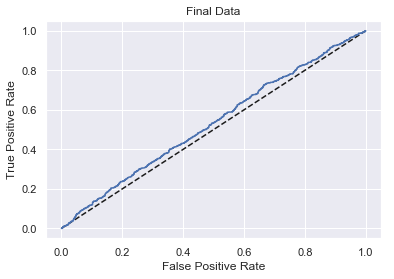

AUC: 53.04%
AUC scores computed using 5-fold cross-validation: 51.8%


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   13.6s remaining:   40.8s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   15.4s finished


Return: 34.0%


In [29]:
# Final Model
clf1 = knn_hyper
clf2 = knn_pipe 
clf3 = knn_bag 

voting_clf = VotingClassifier(
    estimators=[
        ('clf1', clf1),
        ('clf2', clf2),
        ('clf3', clf3)
    ],
    voting='soft'
)
voting_clf.fit(X_train, y_train)

for clf in (clf1, clf2, clf3):
    clf.fit(X_train, y_train)
    #roc_plot(clf, auc_cv=True, final=True)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    
roc_plot(voting_clf, auc_cv=True, title="Final Data")
return_plot(voting_clf, plot=True)

with open('knn_data1_final.pickle', 'wb') as file:
    pickle.dump(voting_clf, file)

/anaconda2/envs/python3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda2/envs/python3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda2/envs/python3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda2/envs/python3/lib/python3.7/site-packages/sklearn/externals/joblib/ex

{'weights': 'distance', 'p': 1, 'n_neighbors': 11, 'n_jobs': -1, 'leaf_size': 27, 'algorithm': 'kd_tree'}
Train Score: 100.0%
Test Score: 50.83%
[[415 563]
 [389 569]]
              precision    recall  f1-score   support

          -1       0.52      0.42      0.47       978
           1       0.50      0.59      0.54       958

   micro avg       0.51      0.51      0.51      1936
   macro avg       0.51      0.51      0.51      1936
weighted avg       0.51      0.51      0.50      1936



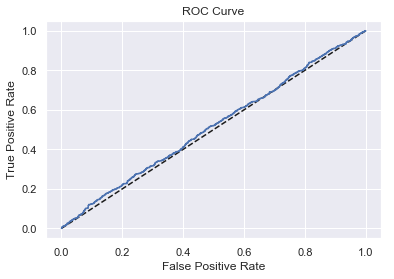

AUC: 51.47%
Return: 12.0%


In [4]:
params = {
    'n_neighbors': np.arange(1,20),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': np.arange(1,50),
    'p': np.arange(1,5),
    'n_jobs': [-1]
}
knn_cv = RandomizedSearchCV(KNeighborsClassifier(), params, cv=5, n_jobs=-1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)
roc_plot(knn_cv)
return_plot(knn_cv)

In [25]:
best_params = {'weights': 'uniform', 'p': 1, 'n_neighbors': 8, 'n_jobs': -1, 'leaf_size': 44, 'algorithm': 'kd_tree'}
knn = KNeighborsClassifier(**best_params)

In [26]:
knn_hyper = knn
knn_hyper.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=44, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=1,
           weights='uniform')

In [27]:
knn_pipe = Pipeline([
    ('polynomials', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
]).fit(X_train, y_train)
#roc_plot(knn_pipe)
#return_plot(knn_pipe, plot=True)

In [28]:
knn_bag = BaggingClassifier(
    base_estimator=knn,
    n_estimators=1000,
    max_samples=500,
    max_features=X.shape[1],
    bootstrap=True,
    n_jobs=-1,
    verbose=1
)
knn_bag.fit(X_train, y_train)
#roc_plot(log_bag)
#return_plot(log_bag, plot=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.4s remaining:    1.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.7s finished


BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='kd_tree', leaf_size=44, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=1,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=7,
         max_samples=500, n_estimators=1000, n_jobs=-1, oob_score=False,
         random_state=None, verbose=1, warm_start=False)

{'n_jobs': -1, 'n_neighbors': 2}
Train Score: 75.59%
Test Score: 50.15%
[[690 288]
 [677 281]]
              precision    recall  f1-score   support

          -1       0.50      0.71      0.59       978
           1       0.49      0.29      0.37       958

   micro avg       0.50      0.50      0.50      1936
   macro avg       0.50      0.50      0.48      1936
weighted avg       0.50      0.50      0.48      1936



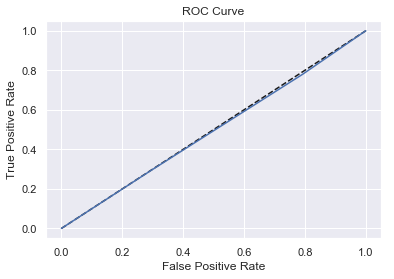

AUC: 49.51%
Return: -10.0%


In [10]:
params = {
    'n_neighbors': np.arange(1,5),
    'n_jobs': [-1]
}
knn_cv = GridSearchCV(KNeighborsClassifier(), params, cv=5, n_jobs=-1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)
roc_plot(knn_cv)
return_plot(knn_cv)

Train Score: 67.29%
Test Score: 51.76%
[[432 546]
 [388 570]]
              precision    recall  f1-score   support

          -1       0.53      0.44      0.48       978
           1       0.51      0.59      0.55       958

   micro avg       0.52      0.52      0.52      1936
   macro avg       0.52      0.52      0.52      1936
weighted avg       0.52      0.52      0.51      1936



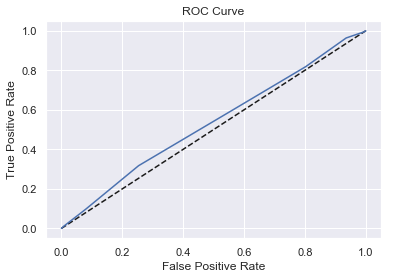

AUC: 53.32%
Return: 19.0%


In [24]:
params = {
    'knn__n_neighbors': np.arange(1,10),
    'knn__n_jobs': [-1]
}
knn_pipe = Pipeline([
    ('polynomials', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('knn', knn)
])
knn_cv = GridSearchCV(knn_pipe, params, cv=5, n_jobs=-1)
knn_cv.fit(X_train, y_train)
roc_plot(knn_cv)
return_plot(knn_cv, plot=False)